# E-commerce Customer Segmentation using K means

# Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans


# Import Data

In [42]:
cd = pd.read_excel("cust_data.xlsx",index_col=0)

In [43]:
cd

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,M,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,M,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis (EDA)

In [44]:
cd.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [45]:
cd.tail()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
29996,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,M,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,M,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29999,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30000,F,3,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [47]:
cd.isnull().sum()

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

In [48]:
cd.shape

(30000, 37)

In [49]:
cd.duplicated().sum()

5171

In [50]:
cd.Gender.value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

# Distribution of orders placed by customers

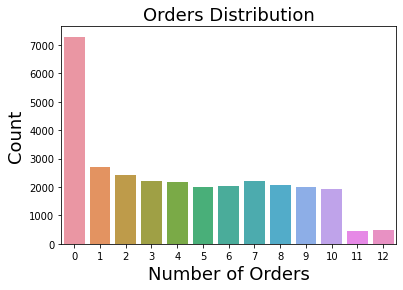

In [51]:
sns.countplot(data=cd, x = "Orders")
plt.title("Orders Distribution", fontsize = 18)
plt.xlabel("Number of Orders", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.show()

# Distribution of gender of customers

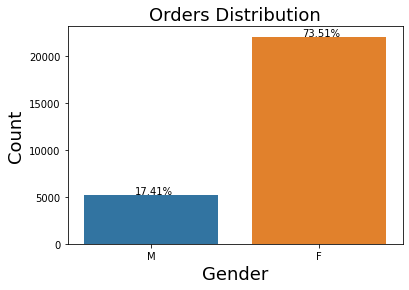

In [52]:
sns.countplot(data = cd, x="Gender")

plt.title("Orders Distribution", fontsize = 18,)
plt.xlabel("Gender", fontsize = 18)
plt.ylabel("Count", fontsize = 18)

plt.text(x = -0.1 , y = cd.Gender.value_counts()[1]+20 , s = str(round((cd.Gender.value_counts()[1])*100/len
                                                                       (cd.Gender),2)) + "%")
plt.text(x = 0.9 , y = cd.Gender.value_counts()[0]+20 ,  s = str(round((cd.Gender.value_counts()[0])*100/len
                                                                       (cd.Gender),2)) + "%")
plt.show()

In [53]:
cd.describe(include= object)

,Gender
count,27276
unique,2
top,F
freq,22054


# Missing data treatment

In [54]:
total = cd.isnull().sum().sort_values(ascending= False)

#percentage of missing values
percent = (cd.isnull().sum()/cd.isnull().count()*100).sort_values(ascending= False)
                                                                      
#create the dataframe using concat func
#keys is the list of column names
#axis = 1 , concats along column
df = pd.concat([total, percent], axis=1, keys=["total", "percent"])
df

,total,percent
Gender,2724,9.08
J.M. Smucker,0,0.00
Juniper,0,0.00
Huawei,0,0.00
Compaq,0,0.00
IBM,0,0.00
Burberry,0,0.00
Mi,0,0.00
LG,0,0.00
Dior,0,0.00


# We plot a heatmap for visulization of missing values

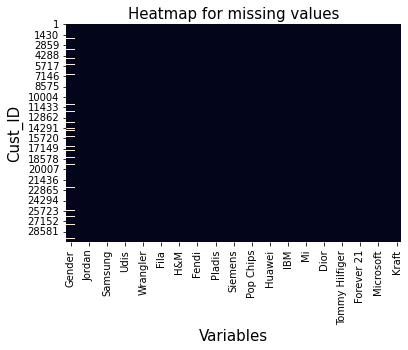

In [55]:
# cbar=False doesnot show the color bar
sns.heatmap(cd.isnull(), cbar=False)

#set the axes and plot lables
#set the font size using "fontsize"
plt.title("Heatmap for missing values",fontsize = 15)
plt.xlabel("Variables",fontsize = 15 )
plt.ylabel("Cust_ID",fontsize = 15 )

plt.show()

# Replace missing values in "gender"

In [56]:
#create dummies against "gender"
cd2 = pd.get_dummies(cd, columns=["Gender"])

cd2.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [57]:
cd2.shape


(30000, 38)

In [58]:
cd2.isnull().sum()

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               

In [61]:
cd2.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


# Data Visulization

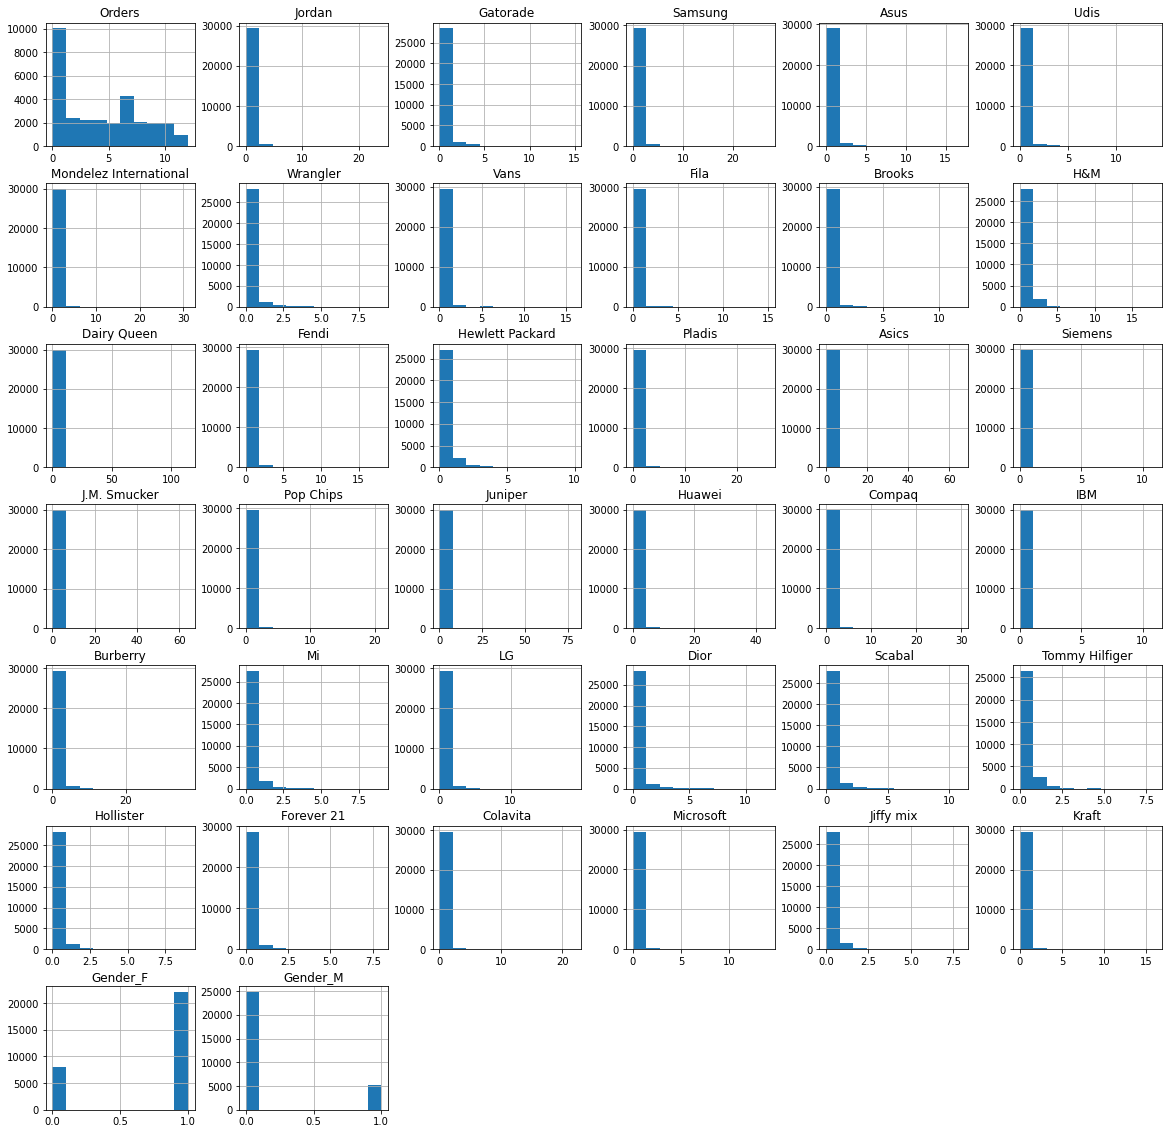

In [62]:
fig = cd2.hist(figsize = (20,20))

#  K-means Clustering

In [96]:
# Prepare the Data
# Scale the data
# Build a model with multiple k


In [63]:
# features conatain only brand names
features = cd2.drop(["Orders", "Gender_F", "Gender_M"], axis=1)

# head() to display top five rows
features.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [64]:
from sklearn.preprocessing import StandardScaler
# instantiate and fit " StandardScaler" function
scale = StandardScaler().fit(features)

#scale the "features" data
features = scale.transform(features)

In [65]:
#create a datframe of the scaled featurex
features_scaled = pd.DataFrame(features, columns=cd2.columns[1:36])

#head() to display top five rows
features_scaled.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#create a list for different values of k
n_clusters = [4, 5, 6, 7, 8]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K

for K in n_clusters :
    cluster = KMeans (n_clusters = K, random_state= 10)
    predict = cluster.fit_predict(features_scaled)
    
    score = silhouette_score(features_scaled, predict, random_state=10)
    print("For n_cluster  = {}, silhouette score is {})".format(K,score))

For n_cluster  = 4, silhouette score is 0.2888293666050933)
For n_cluster  = 5, silhouette score is 0.2734507732644213)
For n_cluster  = 6, silhouette score is 0.21945733520582594)
For n_cluster  = 7, silhouette score is 0.20381188273491252)
For n_cluster  = 8, silhouette score is 0.1996901159338261)


In [67]:
#building a k-means model K=4
model = KMeans(n_clusters=4, random_state=10)

#fit the model
model.fit(features_scaled)

KMeans(n_clusters=4, random_state=10)

# Retrieve the Clusters

In [69]:
data_output = cd2.copy(deep = True)
#add a column "cluster" in the data giving cluster number corresponding to each odservation
data_output["Cluster"] = model.labels_

#head() to display top five rows
data_output.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [71]:
#return_counts=True gives no of obsevation in each cluster
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([ 1255, 22772,  5272,   701], dtype=int64))

# Plot a barplot to visualize the cluster sizes

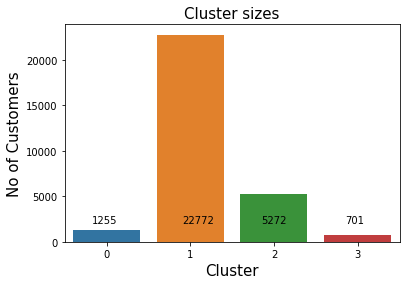

In [76]:
sns.countplot(data= data_output, x="Cluster")

plt.title("Cluster sizes", fontsize = 15)
plt.xlabel("Cluster",fontsize = 15)
plt.ylabel("No of Customers", fontsize = 15)

plt.text(x= -0.18, y=2000 , s=np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x= 0.9, y=2000 , s=np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x= 1.85, y=2000 , s=np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x= 2.85, y=2000 , s=np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

In [73]:
#from a dataframe conatining cluster center
#cluster_centers_ returns the co-ordinates of a cluster center
centers = pd.DataFrame(model.cluster_centers_, columns= data_output.columns[1:36])

In [77]:
centers.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,...,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,...,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,...,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,...,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


# Cluster Analysis

In [78]:

cluster_1 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse=True)[:10]

In [79]:
np.unique(model.labels_, return_counts=True)[1][0]


1255

In [80]:
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

In [81]:
#get the summary for observations in the cluster
#consider the number of orders and customer gender for cluster analysis
data_output[["Orders", "Gender_F", "Gender_M", "Cluster"]][data_output.Cluster == 0].describe()

,Orders,Gender_F,Gender_M,Cluster
count,1255.000000,1255.000000,1255.000000,1255.0
mean,4.146614,0.821514,0.120319,0.0
std,3.630131,0.383074,0.325464,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


In [82]:
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse=True)[:10]


In [83]:
np.unique(model.labels_, return_counts=True)[1][1]

22772

In [84]:
#retrive the top 10 variables present in the cluster
cluster2_var = pd.DataFrame(cluster_2)[1]
cluster2_var

0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4              Fendi
5          Microsoft
6           Colavita
7               Vans
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

In [85]:
#get the summary for observations in the cluster
#consider the number of orders and customer gender for cluster analysis
data_output[["Orders", "Gender_F", "Gender_M", "Cluster"]][data_output.Cluster == 1].describe()

,Orders,Gender_F,Gender_M,Cluster
count,22772.000000,22772.000000,22772.000000,22772.0
mean,4.096829,0.705691,0.195547,1.0
std,3.606516,0.455741,0.396630,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.0


In [86]:
cluster_3 = sorted(zip(list(centers.iloc[2,:]), list(centers.columns)), reverse=True)[:10]


In [87]:
np.unique(model.labels_, return_counts=True)[1][2]


5272

In [88]:
#retrive the top 10 variables present in the cluster
cluster3_var = pd.DataFrame(cluster_3)[1]
cluster3_var

0        Scabal
1        Jordan
2     Hollister
3      Gatorade
4          Dior
5           H&M
6    Forever 21
7          Udis
8        Huawei
9          Asus
Name: 1, dtype: object

In [89]:
#get the summary for observations in the cluster
#consider the number of orders and customer gender for cluster analysis
data_output[["Orders", "Gender_F", "Gender_M", "Cluster"]][data_output.Cluster == 2].describe()

,Orders,Gender_F,Gender_M,Cluster
count,5272.000000,5272.000000,5272.000000,5272.0
mean,4.459598,0.845220,0.089340,2.0
std,3.503566,0.361729,0.285261,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0


In [90]:
#sort the variables based on cluster centers
cluster_4 = sorted(zip(list(centers.iloc[3,:]), list(centers.columns)), reverse=True)[:10]

In [91]:
#size of cluster_4
np.unique(model.labels_, return_counts=True)[1][3]

701

In [92]:
#retrive the top 10 variables present in the cluster
cluster4_var = pd.DataFrame(cluster_4)[1]
cluster4_var

0                   Siemens
1                     Asics
2              J.M. Smucker
3                 Pop Chips
4                   Juniper
5                    Huawei
6                        Mi
7                    Compaq
8    Mondelez International
9                 Microsoft
Name: 1, dtype: object

In [93]:
#get the summary for observations in the cluster
#consider the number of orders and customer gender for cluster analysis
data_output[["Orders", "Gender_F", "Gender_M", "Cluster"]][data_output.Cluster == 3].describe()

,Orders,Gender_F,Gender_M,Cluster
count,701.000000,701.000000,701.000000,701.0
mean,4.402282,0.708987,0.209700,3.0
std,3.522693,0.454554,0.407385,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,3.0


# In this case study, we have grouped the customers dataset into 4 clusters based on the brands they have searched on e-commerce sites. We have used the silhouette score method to find the optimum number of clusters and decided k = 4 as the best pick after analyzing the silhouette score.